In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [66]:
# Tạo dữ liệu 
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
print(df)

     x   y
0   12  39
1   20  36
2   28  30
3   18  52
4   29  54
5   33  46
6   24  55
7   45  59
8   45  63
9   52  70
10  51  66
11  52  63
12  55  58
13  53  23
14  55  14
15  61   8
16  64  19
17  69   7
18  72  24


In [67]:
# Số cluster 
k = 5

In [68]:
# Chọn ngẫu nhiên 3 điểm làm center cho dữ liệu => 1 dictionary; center = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
print(centroids)

{1: [33, 4], 2: [61, 64], 3: [44, 73], 4: [74, 35], 5: [55, 41]}


In [69]:
n = np.linspace(0, 1, k)
print(n)
colors = cm.rainbow(n)

colors

[0.   0.25 0.5  0.75 1.  ]


array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [70]:
# Chọn ngẫu nhiên K điểm center từ data
def create_center(k):
    r = []
    for i in range(k): r.append(np.random.randint(0, len(df)))
    print(r)
    centroids = {
        i+1: [df['x'][r[i]], df['y'][r[i]]]
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [79]:
centroids = create_center(k)
centroids.keys()

[7, 8, 18, 6, 14]


dict_keys([1, 2, 3, 4, 5])

KeyError: 4

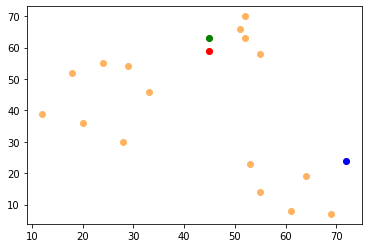

In [80]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color=colors[3])
# Màu cho mỗi cluster 
colmap = {
    1: 'r',
    2: 'g',
    3: 'b'
}

# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])


plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

ax.legend(fontsize='small')

1
2
3
4
5


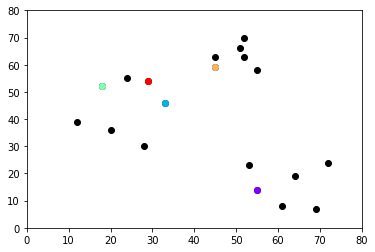

In [72]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color='k')

# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

#ax.legend(fontsize='small')

1
2
3
4
5


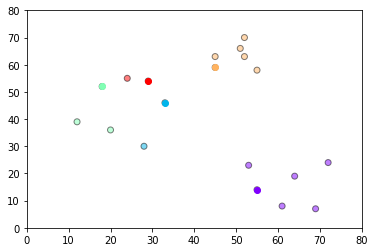

In [74]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [75]:
import copy

old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)

{1: [62.333333333333336, 15.833333333333334], 2: [30.5, 38.0], 3: [16.666666666666668, 42.333333333333336], 4: [50.0, 63.166666666666664], 5: [26.5, 54.5]}


     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        55.408834        18.527007         5.734884   
1   20  36        46.891423        10.688779         7.156970   
2   28  30        37.141247         8.381527        16.749793   
3   18  52        57.214266        18.768324         9.758187   
4   29  54        50.673519        16.070159        16.977109   
5   33  46        42.076980         8.381527        16.739839   
6   24  55        54.803943        18.200275        14.636332   
7   45  59        46.516723        25.519600        32.871805   
8   45  63        50.250760        28.900692        35.069772   
9   52  70        55.143500        38.551913        44.876373   
10  51  66        51.430914        34.702305        41.699987   
11  52  63        48.285321        32.973474        40.933550   
12  55  58        42.799598        31.626729        41.411217   
13  53  23        11.767422        27.041635        41.156881   
14  55  14         7.5590

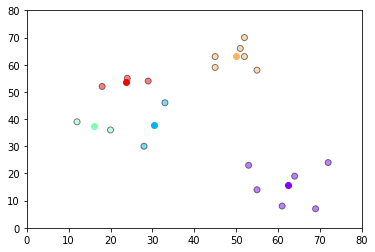

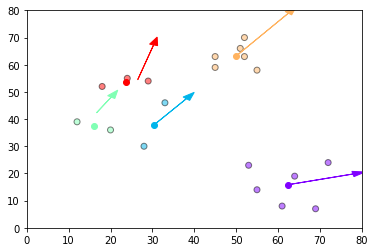

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        55.408834        18.527007         4.272002   
1   20  36        46.891423        10.688779         4.272002   
2   28  30        37.141247         8.381527        14.150972   
3   18  52        57.214266        18.768324        14.637281   
4   29  54        50.673519        16.070159        21.005952   
5   33  46        42.076980         8.381527        19.006578   
6   24  55        54.803943        18.200275        19.241881   
7   45  59        46.516723        25.519600        36.100554   
8   45  63        50.250760        28.900692        38.616706   
9   52  70        55.143500        38.551913        48.500000   
10  51  66        51.430914        34.702305        45.135906   
11  52  63        48.285321        32.973474        44.116324   
12  55  58        42.799598        31.626729        44.059619   
13  53  23        11.767422        27.041635        39.739779   
14  55  14         7.5590

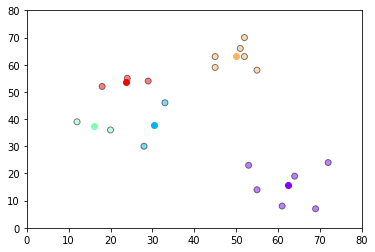

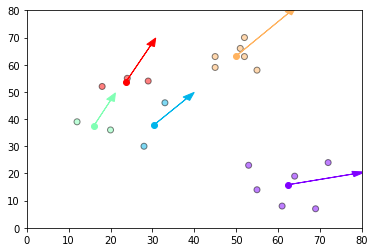

In [76]:
# Chạy K_means_clustering => điều kiện dừng khi tọa độ old_center = new_center
while old_centroids != centroids:
    df = assigment(df, centroids)
    print(df)
    old_centroids = copy.deepcopy(centroids)
    centroids = update(centroids)
    print(centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = (centroids[i][0]) - old_centroids[i][0]*0.75
        dy = (centroids[i][1]) - old_centroids[i][1]*0.75
        ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colors[i-1], ec=colors[i-1])
    plt.show()